#  Dataset 이해하기

- DeepChem의 `Dataset` 클래스는 NumPy, Pandas, TensorFlow, PyTorch와 쉽게 호환되도록 만든 데이터셋 구조체이다

# import

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 2.1 MB/s 
     |████████████████████████████████| 36.8 MB 39 kB/s 


In [ ]:
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
%config InlineBackend.figure_format = 'retina'

# Dataset 다운로드

- dc.molnet.load_XXX() 함수 사용
- load_delaney()를 사용하면 Delaney 용해도  dataset을 다운로드함
 - 1128개 화합물의 용해도 데이터
- 다운로드시 원하는 feature를 선택할 수 있다
- 아래에서는 그래프 콘볼류션 표현법을 선택

In [ ]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

## load_XXX() 옵션
### featurizer 
- 'ECFP', 'GraphConv', 'Weave', 'smiles2img' 등을 선택할 수 있다

### splitter 
- 'None', 'index', 'random', 'scaffold', 'stratified' 등을 선택할 수 있다


## load_XXX() 리턴 값

- `tasks`: 태스크 이름을 알려준다 (타겟 작업이 무엇인지. 하나 또는 복수)
- `datasets`: `dc.data.Dataset` 객체로서 `(train, valid, test)` 세 부분으로 나누어준다
- `transformers`: `dc.trans.Transformer` 객체로서 전처리 방법을 알려준다

In [ ]:
print(tasks)

['measured log solubility in mols per litre']


In [ ]:
print(test_dataset)

<DiskDataset X.shape: (113,), y.shape: (113, 1), w.shape: (113, 1), ids: ['c1cc2ccc3cccc4ccc(c1)c2c34' 'Cc1cc(=O)[nH]c(=S)[nH]1'
 'Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 ' ...
 'c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43' 'Cc1occc1C(=O)Nc2ccccc2'
 'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '], task_names: ['measured log solubility in mols per litre']>


- `DiskDataset`은 하드디스크에 저장하고 액세스할 데이터셋이다.
- `NumpyDataset` 은 메인 메모리에 저장하고 사용할 데이터로 NumPy arrays 형식으로 저장된다  
- `ImageDataset`은 디스크에 저장되는 이미지 데이터 형식이다 

- 여기서 각 행은 샘플을 가리키며 여기서는 분자를 구분하며 다음의 값들을 갖는다
 - The *features*, referred to as `X`.  
 - The *labels*, referred to as `y`.  
 - The *weights*, referred to as `w` (이 샘플의 가중치를 표시)  
 - An *ID*, is a unique identifier (여기서는 SMILES를 사용)

## Dataset의 X, y 보기
- 현재 X는 ConvMol 형태임

In [ ]:
test_dataset.X[:3]

array([<deepchem.feat.mol_graphs.ConvMol object at 0x7f9934846250>,
      dtype=object)

In [ ]:
test_dataset.X[0].get_atom_features().shape

(16, 75)

In [ ]:
smi = test_dataset.ids[0]
smi

'c1cc2ccc3cccc4ccc(c1)c2c34'

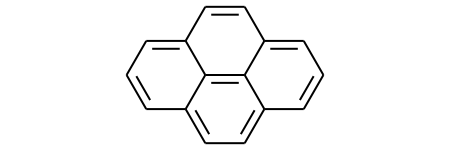

In [ ]:
Chem.MolFromSmiles(smi)

In [ ]:
test_dataset.X[0].get_adjacency_list()

[[5, 6],
 [13, 8],
 [12, 7],
 [7, 13],
 [9, 12],
 [0, 10],
 [11, 0],
 [2, 3],
 [1, 11],
 [10, 4],
 [5, 9, 14],
 [8, 6, 14],
 [4, 2, 15],
 [3, 1, 15],
 [11, 15, 10],
 [14, 12, 13]]

## 한 샘플씩 읽는 방법

- `itersamples()` 사용하며 소수의 샘플만 읽음으로써 메모리 처리 속도를 높일 수 있다

In [ ]:
for X, y, w, ids in test_dataset.itersamples():
    print(y, ids)

[-1.60114461] c1cc2ccc3cccc4ccc(c1)c2c34
[0.20848251] Cc1cc(=O)[nH]c(=S)[nH]1
[-0.01602738] Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 
[-2.82191713] c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45
[-0.52891635] C1=Cc2cccc3cccc1c23
[1.10168349] CC1CO1
[-0.88987406] CCN2c1ccccc1N(C)C(=S)c3cccnc23 
[-0.52649706] CC12CCC3C(CCc4cc(O)ccc34)C2CCC1=O
[-0.76358725] Cn2cc(c1ccccc1)c(=O)c(c2)c3cccc(c3)C(F)(F)F
[-0.64020358] ClC(Cl)(Cl)C(NC=O)N1C=CN(C=C1)C(NC=O)C(Cl)(Cl)Cl 
[-0.38569452] COc2c1occc1cc3ccc(=O)oc23 
[-0.62568785] CN2C(=C(O)c1ccccc1S2(=O)=O)C(=O)Nc3ccccn3 
[-0.39585553] Cc3cc2nc1c(=O)[nH]c(=O)nc1n(CC(O)C(O)C(O)CO)c2cc3C
[-2.05306753] c1ccc(cc1)c2ccc(cc2)c3ccccc3
[-0.29666474] CC34CC(=O)C1C(CCC2=CC(=O)CCC12C)C3CCC4(=O) 
[-0.73213651] c1ccc2c(c1)sc3ccccc23
[-1.27744393] CC23Cc1cnoc1C=C2CCC4C3CCC5(C)C4CCC5(O)C#C
[0.0081655] OC(C(=O)c1ccccc1)c2ccccc2
[0.97588054] OCC2OC(Oc1ccccc1CO)C(O)C(O)C2O
[-0.10796031] CC3C2CCC1(C)C=CC(=O)C(=C1C2OC3=O)C
[0.59847167] O=Cc2ccc1OCOc1c2 
[-0.60149498] CC1CCCCC1NC(=O)N

## 배치 단위로 읽는 방법

- use `iterbatches()` to iterate over batches of samples.

In [ ]:
for X, y, w, ids in test_dataset.iterbatches(batch_size=50):
    print(y.shape)

(50, 1)
(50, 1)
(13, 1)


## 데이터를 읽는 다른 방법
- `iterbatches(batch_size=100, epochs=10, deterministic=False)` 
 - epoch를 지정할 수 있으며, 읽을 때마다 순서를 랜덤하게 바꾼다
- `to_dataframe()`을 사용하면 데이터프레임으로 읽는다
- TensorFlow 타입, 즉 `tensorflow.data.Dataset`을 얻으려면 `make_tf_dataset()`를 사용한다  
- Torch 타입의 `torch.utils.data.IterableDataset`을 얻으려면 `make_pytorch_dataset()`를 사용한다



In [ ]:
test_dataset.to_dataframe()

,X,y,w,ids
0,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.601145,1.0,c1cc2ccc3cccc4ccc(c1)c2c34
1,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.208483,1.0,Cc1cc(=O)[nH]c(=S)[nH]1
2,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.016027,1.0,Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4
3,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.821917,1.0,c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45
4,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.528916,1.0,C1=Cc2cccc3cccc1c23
...,...,...,...,...
108,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.656304,1.0,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl
109,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.743629,1.0,c1ccsc1
110,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.420799,1.0,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
111,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.209570,1.0,Cc1occc1C(=O)Nc2ccccc2


In [ ]:
print(transformers)

# Datasets 새로 생성하기

- `NumpyDataset`을 사용하여 DeepChem Dataset을 만들 수 있다

In [ ]:
import numpy as np

X = np.random.random((10, 5))
y = np.random.random((10, 2))
dataset = dc.data.NumpyDataset(X=X, y=y)
print(dataset)

<NumpyDataset X.shape: (10, 5), y.shape: (10, 2), w.shape: (10, 1), ids: [0 1 2 3 4 5 6 7 8 9], task_names: [0 1]>


- weights 와 IDs는 자동으로 배정되었다.  (w=1)

In [ ]:
dataset.to_dataframe()

,X1,X2,X3,X4,X5,y1,y2,w,ids
0,0.216339,0.336398,0.058804,0.592076,0.417573,0.565249,0.598911,1.0,0
1,0.431747,0.693421,0.106645,0.038640,0.272358,0.509061,0.476606,1.0,1
2,0.735348,0.604938,0.058306,0.709647,0.566805,0.188739,0.287621,1.0,2
3,0.416166,0.617349,0.155695,0.154130,0.115839,0.220255,0.909334,1.0,3
4,0.593809,0.410758,0.468654,0.794214,0.483590,0.855983,0.952632,1.0,4
5,0.313064,0.006898,0.787333,0.596571,0.240066,0.635147,0.574032,1.0,5
6,0.439678,0.499639,0.087755,0.773948,0.828414,0.953597,0.769245,1.0,6
7,0.752780,0.481071,0.591786,0.477677,0.782894,0.503919,0.868801,1.0,7
8,0.915408,0.323727,0.960845,0.271936,0.025886,0.746895,0.780014,1.0,8
9,0.081494,0.839975,0.240899,0.588947,0.184307,0.487032,0.608415,1.0,9


## DiskDataset 만들기
- NumPy arrays가 있으면 `DiskDataset.from_numpy()` 를 사용하여 만들 수 있다

In [ ]:
import tempfile

with tempfile.TemporaryDirectory() as data_dir:
    disk_dataset = dc.data.DiskDataset.from_numpy(X=X, y=y, data_dir=data_dir)
    print(disk_dataset)

<DiskDataset X.shape: (10, 5), y.shape: (10, 2), w.shape: (10, 1), ids: [0 1 2 3 4 5 6 7 8 9], task_names: [0 1]>


- 대용량의 데이터를 읽을 때 DeepChem의 `DataLoader` 를 사용하여 편리하게 읽을 수 있다.



# MoleculeNet 소개

- dc.molnet 모듈에서 제공

## 제공되는 데이터셋 확인

In [ ]:
all_load = [method for method in dir(dc.molnet) if "load_" in method ]
print(len(all_load))
all_load

42


['load_Platinum_Adsorption',
 'load_bace_classification',
 'load_bace_regression',
 'load_bandgap',
 'load_bbbc001',
 'load_bbbc002',
 'load_bbbp',
 'load_cell_counting',
 'load_chembl',
 'load_chembl25',
 'load_clearance',
 'load_clintox',
 'load_delaney',
 'load_factors',
 'load_freesolv',
 'load_function',
 'load_hiv',
 'load_hopv',
 'load_hppb',
 'load_kaggle',
 'load_kinase',
 'load_lipo',
 'load_mp_formation_energy',
 'load_mp_metallicity',
 'load_muv',
 'load_nci',
 'load_pcba',
 'load_pdbbind',
 'load_perovskite',
 'load_ppb',
 'load_qm7',
 'load_qm8',
 'load_qm9',
 'load_sampl',
 'load_sider',
 'load_sweet',
 'load_thermosol',
 'load_tox21',
 'load_toxcast',
 'load_uspto',
 'load_uv',
 'load_zinc15']

## MoleculeNet Dataset 카테고리

- Original MoleculeNet paper [1]에 정의된 것은"V1"으로 나머지는"V2"로 구분함 

## Quantum Mechanical Datasets

- quantum mechanical property prediction tasks 데이터

- [`dc.molnet.load_qm7`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_qm7): V1
- [`dc.molnet.load_qm7b_from_mat`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_qm7): V1
- [`dc.molnet.load_qm8`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_qm8): V1
- [`dc.molnet.load_qm9`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_qm9): V1

## Physical Chemistry Datasets

- contain a variety of tasks for predicting various physical properties of molecules.

- [`dc.molnet.load_delaney`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_delaney): V1. This dataset is also referred to as ESOL in the original  paper.
- [`dc.molnet.load_sampl`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_sampl): V1. This dataset is also referred to as FreeSolv in the original  paper.
- [`dc.molnet.load_lipo`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_lipo): V1. This dataset is also referred to as Lipophilicity in the original  paper.
- [`dc.molnet.load_thermosol`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_thermosol): V2.
- [`dc.molnet.load_hppb`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_hppb): V2.
- [`dc.molnet.load_hopv`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_hopv): V2. This dataset is drawn from a recent publication [3]

## Chemical Reaction Datasets

- chemical reaction datasets for use in computational retrosynthesis / forward synthesis.

- [`dc.molnet.load_uspto`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_uspto)

## Biochemical/Biophysical Datasets

- e.g., the binding affinity of compounds to proteins.

- [`dc.molnet.load_pcba`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_pcba): V1
- [`dc.molnet.load_nci`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_nci): V2.
- [`dc.molnet.load_muv`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_muv): V1
- [`dc.molnet.load_hiv`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_hiv): V1
- [`dc.molnet.load_ppb`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#ppb-datasets): V2.
- [`dc.molnet.load_bace_classification`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_bace_classification): V1. This loader loads the classification task for the BACE dataset from the original MoleculeNet paper.
- [`dc.molnet.load_bace_regression`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_bace_regression): V1. This loader loads the regression task for the BACE dataset from the original MoleculeNet paper.
- [`dc.molnet.load_kaggle`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_kaggle): V2. This dataset is from Merck's drug discovery kaggle contest and is described in [4].
- [`dc.molnet.load_factors`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_factors): V2. This dataset is from [4].
- [`dc.molnet.load_uv`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_uv): V2. This dataset is from [4].
- [`dc.molnet.load_kinase`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_kinase): V2. This datset is from [4].

## Molecular Catalog Datasets

These datasets provide molecular datasets which have no associated properties beyond the raw SMILES formula or structure. These types of datasets are useful for generative modeling tasks.

- [`dc.molnet.load_zinc15`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_zinc15): V2
- [`dc.molnet.load_chembl`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_chembl): V2
- [`dc.molnet.load_chembl25`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#chembl25-datasets): V2

## Physiology Datasets

These datasets measure physiological properties of how molecules interact with human patients.

- [`dc.molnet.load_bbbp`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_bbbp): V1
- [`dc.molnet.load_tox21`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_tox21): V1
- [`dc.molnet.load_toxcast`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_toxcast): V1
- [`dc.molnet.load_sider`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_sider): V1
- [`dc.molnet.load_clintox`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_clintox): V1
- [`dc.molnet.load_clearance`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_clearance): V2.

## Structural Biology Datasets

These datasets contain 3D structures of macromolecules along with associated properties.

- [`dc.molnet.load_pdbbind`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_pdbbind): V1


## Microscopy Datasets

These datasets contain microscopy image datasets, typically of cell lines. These datasets were not in the original MoleculeNet paper.

- [`dc.molnet.load_bbbc001`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_bbbc001): V2
- [`dc.molnet.load_bbbc002`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_bbbc002): V2
- [`dc.molnet.load_cell_counting`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#cell-counting-datasets): V2

## Materials Properties Datasets

These datasets compute properties of various materials.

- [`dc.molnet.load_bandgap`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_bandgap): V2
- [`dc.molnet.load_perovskite`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_perovskite): V2
- [`dc.molnet.load_mp_formation_energy`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_mp_formation_energy): V2
- [`dc.molnet.load_mp_metallicity`](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_mp_metallicity): V2

[1] Wu, Zhenqin, et al. "MoleculeNet: a benchmark for molecular machine learning." Chemical science 9.2 (2018): 513-530.

[3] Lopez, Steven A., et al. "The Harvard organic photovoltaic dataset." Scientific data 3.1 (2016): 1-7.

[4] Ramsundar, Bharath, et al. "Is multitask deep learning practical for pharma?." Journal of chemical information and modeling 57.8 (2017): 2068-2076.